In [19]:
from triqs_dft_tools.sumk_dft_tools import *
from triqs.gf import *
from h5 import HDFArchive
from triqs.operators.util import *
from triqs_cthyb import *
import triqs.utility.mpi as mpi

In [20]:
dft_filename = "nsp"  # filename
U = 4.0  # interaction parameters
J = 0.65
beta = 40  # inverse temperature
loops = 15  # number of DMFT loops
mix = 0.8  # mixing factor of Sigma after solution of the AIM
dc_type = 1  # DC type: 0 FLL, 1 Held, 2 AMF
use_blocks = True  # use bloc structure from DFT input
prec_mu = 0.0001  # precision of chemical potential

SK = SumkDFTTools(hdf_file=dft_filename + ".h5", use_dft_blocks=use_blocks)

In [21]:
# case.h5 ファイルを読み取りモード ('r') で開く
with HDFArchive(dft_filename + ".h5", "r") as ar:
    # HDF5ファイルの中に含まれるキーをリスト表示する
    keys = ar.keys()
    print("Keys in the HDF5 file:", keys)

    # 特定のキーの内容を表示する (例: 'dmft_output')
    if "dmft_output" in keys:
        dmft_data = ar["dmft_output"]
        print("Content of 'dmft_output':", dmft_data)

Keys in the HDF5 file: ['dft_input', 'dft_misc_input']


In [22]:
SK.deg_shells

[[['up_0', 'down_0']]]

In [23]:
w_mesh = MeshReFreq(window=(-10, 4), n_w=1000)
DOS, DOSprojDict, DOSproj_orbDict = SK.density_of_states(
    with_dc=False,
    with_Sigma=False,
    mesh=w_mesh,
    broadening=0.1,
    proj_type="wann",
    save_to_file=False,
)

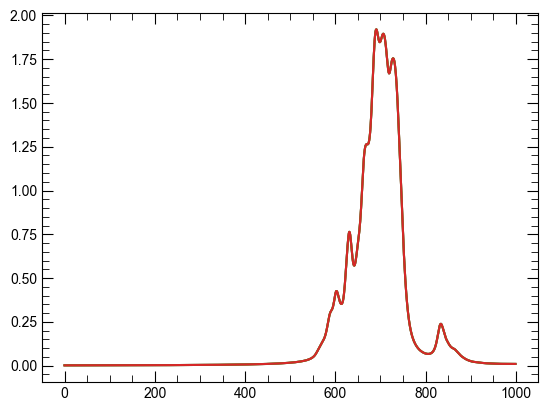

In [24]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
# ax.plot(np.array(dos[0]['up']))
for i in range(len(DOSprojDict)):
    ax.plot(np.array(DOSprojDict[i]["up"]))

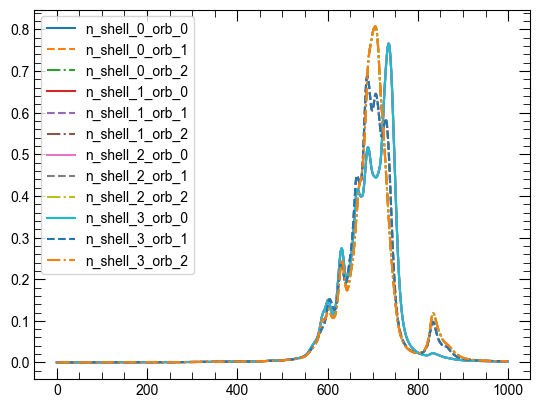

In [25]:
linestyles = ["-", "--", "-.", ":"]
fig, ax = plt.subplots()
# ax.plot(np.array(dos[0]['up']))
for i in range(len(DOSproj_orbDict)):
    for j in range(DOSproj_orbDict[i]["up"].shape[1]):
        ax.plot(
            np.array(DOSproj_orbDict[i]["up"])[:, j, j],
            label=f"n_shell_{i}_orb_{j}",
            linestyle=linestyles[j],
        )
ax.legend()

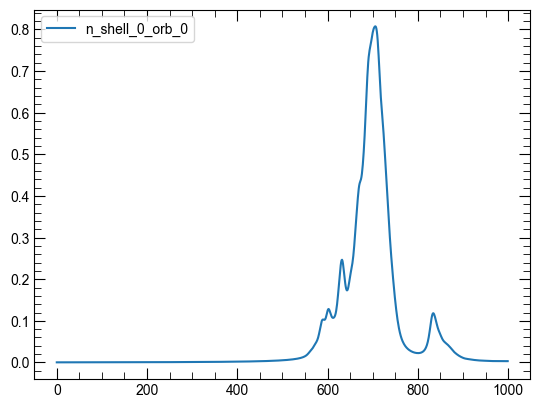

In [26]:
fig, ax = plt.subplots()
# ax.plot(np.array(dos[0]['up']))
ax.plot(np.array(DOSproj_orbDict[0]["up"])[:, 2, 2], label=f"n_shell_{0}_orb_{0}")
ax.legend()

In [27]:
SK.rot_mat

[array([[-0.15140001+0.j,  0.18686151-0.j, -0.97064969+0.j],
        [-0.89637165+0.j, -0.43986124+0.j,  0.05513579+0.j],
        [-0.41664842+0.j,  0.87841042+0.j,  0.23409236+0.j]]),
 array([[ 0.15139442+0.00000000e+00j,  0.18686594-0.00000000e+00j,
         -0.97064971+0.00000000e+00j],
        [ 0.89638278-7.59013727e-05j, -0.43983868+8.64460301e-05j,
          0.0551347 +4.80376661e-06j],
        [ 0.4166265 +3.25992153e-05j,  0.87842077-3.71280868e-05j,
          0.23409253-2.06319091e-06j]]),
 array([[-0.15141063+0.j,  0.18681798-0.j, -0.97065641+0.j],
        [-0.8963417 +0.j, -0.43992062+0.j,  0.05514885+0.j],
        [-0.41670898+0.j,  0.87838994+0.j,  0.23406141+0.j]]),
 array([[-0.15139712+0.j,  0.18684846-0.j, -0.97065265+0.j],
        [-0.8963568 +0.j, -0.43989216+0.j,  0.0551306 +0.j],
        [-0.41668142+0.j,  0.87839771+0.j,  0.23408129+0.j]])]